In [1]:
### Figure 5A_B for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy.spatial import distance
import pathlib
import os
from sklearn.decomposition import PCA

np.random.seed(7) #3 57

In [2]:
# set data input folder
# download files described in README.md to this folder
data_input_folder = ""

# set output folder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
# Import the Hela DMEM gene level profiles
cp257_dmem_df = pd.read_csv(os.path.join(data_input_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS_plate_level_gene_aggregated.csv.gz'))
cp257_dmem_df = cp257_dmem_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Import the Hela DMEM hits from the hit calling process then subset the gene level profiles for all hits 
comp_spef_hits = pd.read_csv('../3_HELA_WGS_Summary/Fig3_A_B/cp257_dmem_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv')
comp_spef_hits = comp_spef_hits.rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hits = pd.read_csv('../3_HELA_WGS_Summary/Fig3_A_B/cp257_dmem_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv')
whole_cell_hits = whole_cell_hits.rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hit_list = list(whole_cell_hits.index)

hit_list = list(comp_spef_hits.index) + list(whole_cell_hits.index)
df_hits = cp257_dmem_df.loc[hit_list]
df_hits

,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,...,Nuclei_Texture_SumVariance_DAPI_Painting_10_02_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_01_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
A4GALT,-0.003687,-0.001517,-0.024211,-0.002230,-0.000985,0.048217,-0.247624,-0.385445,-0.181542,-0.310485,...,-0.205460,-0.124003,-0.061160,-0.064534,-0.158805,-0.175165,-0.100943,-0.116820,-0.127088,-0.208700
AADAT,0.010149,-0.050984,-0.000033,-0.011308,0.000147,-0.390320,0.192267,0.127596,0.360045,-0.037015,...,0.035560,0.096781,0.002351,0.014290,-0.047730,-0.055333,-0.027467,-0.030975,-0.054734,-0.066406
AAGAB,0.001373,-0.073191,0.005038,-0.008009,-0.000422,-0.110842,0.408275,0.010436,0.014049,-0.013480,...,-0.364305,-0.374600,-0.045733,-0.048909,-0.093886,-0.073781,-0.127453,-0.269980,0.009450,-0.024553
AARSD1,0.011580,-0.099327,-0.017418,0.022201,0.004731,-0.048940,-0.060862,-0.170685,-0.057970,-0.051002,...,-0.251240,-0.230710,-0.123475,-0.036832,-0.078641,-0.171565,-0.146525,-0.317805,-0.210240,-0.273045
AASDHPPT,0.010061,-0.008188,0.016220,-0.005553,0.001298,-0.359410,-0.452070,-0.113907,0.367390,-0.194975,...,-0.160485,-0.184115,-0.156485,-0.030092,-0.156475,-0.236350,-0.165520,-0.378370,-0.270330,-0.201435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZP3,0.002234,0.023157,0.012874,0.013057,0.000447,-0.268155,-0.032118,-0.136975,0.203412,-0.126557,...,-0.166314,-0.231420,-0.150015,-0.063093,-0.058868,-0.073555,-0.056141,-0.257935,-0.285295,-0.359115
ZPR1,0.000413,-0.015735,-0.015433,0.001812,-0.000215,-0.551765,-0.001942,0.403800,0.569805,-0.217560,...,0.242875,0.536345,0.335195,0.045955,-0.013645,0.059679,-0.001273,0.092637,-0.032070,-0.005467
ZSWIM8,0.008489,0.287793,-0.001380,0.012269,0.002484,-0.070610,-0.190660,-0.032445,-0.026930,-0.222235,...,-0.109120,0.011316,0.010509,0.018169,-0.121815,-0.111510,-0.119964,-0.045433,0.318355,-0.044189


In [4]:
# Perform principle component analysis & select components representing 70% of the variation from the data set
pca = PCA(n_components=75)
df_hits_pca = pd.DataFrame(pca.fit_transform(df_hits),index=df_hits.index)
df_hits_pca = df_hits_pca.reset_index()
df_hits_pca

,Metadata_Foci_Barcode_MatchedTo_GeneCode,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,A4GALT,-6.605163,-1.486661,0.561727,-0.022946,0.622741,-2.035755,-0.250695,0.516637,0.338742,...,-0.137118,0.643679,-0.451204,0.516068,-0.322504,0.431915,0.693493,0.161700,-0.628196,-0.269098
1,AADAT,3.239729,-1.917427,0.186562,-0.996945,-1.036008,-0.700663,-0.213684,-0.425547,1.522795,...,-0.196054,0.286107,-0.000326,-0.301571,-0.450304,0.035418,0.047909,-0.319255,-0.183554,0.359639
2,AAGAB,-0.385966,-1.976094,-5.683792,2.657807,0.671442,0.633168,-1.643910,1.591522,-1.805018,...,-0.234915,-0.016421,0.287359,0.000533,0.154332,0.099356,0.530864,-0.337133,0.318601,0.278293
3,AARSD1,-5.526339,-0.919157,2.124758,-2.127335,0.229689,-0.141629,-0.516680,-0.376504,1.147600,...,-0.251124,0.171466,-0.193545,-1.073793,-0.156889,-0.612050,-0.383625,0.381950,-0.219271,0.827536
4,AASDHPPT,-2.887035,6.138479,-3.761078,-2.051477,2.239069,-0.403315,0.859499,1.875794,1.166338,...,-0.418972,-0.222060,-0.173266,0.646610,0.455217,0.048401,0.690289,-0.172003,0.099402,-0.170940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,ZP3,-3.235321,4.953116,2.249152,0.526933,-1.208167,-0.871635,-0.932720,-0.394653,1.937773,...,-0.272897,-0.289298,0.143325,-0.107298,0.079694,0.199620,0.100741,0.371790,-0.232531,0.273095
4677,ZPR1,13.454316,4.411361,2.171386,-3.069164,1.210735,3.703342,-1.852048,-0.632047,1.377511,...,-0.333871,0.317663,-0.161129,0.254810,-0.127085,0.039416,0.086647,0.551791,-0.402360,0.576425
4678,ZSWIM8,5.038060,-1.446766,0.365135,-6.078490,3.641857,-0.789370,0.532543,0.657733,-0.117205,...,-0.370625,-0.208137,0.644422,0.777104,0.591435,0.142665,0.176375,0.649097,0.538791,-0.130408
4679,ZYX,4.438526,-3.036510,-0.843116,0.966858,-0.095225,-0.635300,0.694442,0.197373,0.870701,...,0.365012,0.216329,0.090010,0.149923,0.451919,0.164803,0.483300,0.482570,0.255928,-0.369906


In [5]:
# Perform principle component analysis & select components representing 70% of the variation from the data set
x = list(pca.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
print('Explained variance ratio :', y[74])
#y

Explained variance ratio : 0.6967605227520185


In [6]:
# Function to perform hierarchial clustering based on profiles correlation and drawing the heatmap
def clustered_heat_map(data,file_name,font_scale=0.8,linewidth=1):

        corr = data.corr()
        sns.set(font_scale=font_scale)


        ax = sns.clustermap(
            corr, 
            vmin=-1, vmax=1, center=0,
            method = 'ward',
            figsize = (30 ,30),
            cmap=sns.diverging_palette(250, 10 ,s=100,l=35, n=100),#sns.diverging_palette(220, 10, l=40,n=100),
            linewidth = linewidth,
            linecolor='white',
            dendrogram_ratio =0.1,
            square=True,
            cbar_kws={"shrink": .05,"aspect":40}
        )        
        ax.cax.set_visible(False)
        ax.ax_row_dendrogram.set_visible(False)
        ax.ax_col_dendrogram.set_visible(False)
        output_file = pathlib.Path(f"{file_name}")
        plt.savefig(os.path.join(output_folder,output_file),bbox_inches='tight', dpi=600,facecolor='w', edgecolor='w')
        plt.show()

In [7]:
# Subset the profiles to select relevant genes
gene_set = 'WP_PI3KAKT_SIGNALING_PATHWAY'
genes = 'AKT3	BCL2L11	MIR1181	MIR4260	MIR3652	LINC02478	C8orf44-SGK3	MIR4758	SGK2	LPAR6	CDK2	CDK4	CDK6	CDKN1A	CDKN1B	LAMC3	CREB3	GNB5	CHAD	CDC37	CHRM1	CHRM2	CHUK	THEM4	PIK3AP1	COL1A1	COL1A2	COL2A1	COL4A1	COL4A2	COL4A3	COL4A4	COL4A5	COL4A6	COL6A1	COL6A2	COL6A3	COL9A1	COL9A2	COL9A3	COMP	COL6A6	CREB1	ATF2	ATF6B	CSF1	CSF1R	CSF3	CSF3R	CSH1	CSH2	CSHL1	PIK3R6	CREB3L4	LPAR1	EFNA1	EFNA2	EFNA3	EFNA4	EFNA5	EGF	EGFR	EPHA2	EIF4B	EIF4E	EIF4EBP1	EPO	EPOR	AKT1	AKT2	F2R	FGF1	FGF2	FGF3	FGF4	FGF5	FGF6	FGF7	FGF8	FGF9	FGF10	FGF11	FGF12	FGF13	FGF14	FGFR1	FGFR3	FGFR2	FGFR4	VEGFD	LAMB4	ITGA11	PHLPP2	FOXO3	FLT1	FLT3	FLT3LG	PHLPP1	FLT4	FN1	PIK3R5	LPAR3	SGK3	MTOR	EIF4E1B	G6PC1	COL6A5	FGF20	FGF21	GH1	GH2	GHR	FGF22	GNB1	GNB2	GNB3	GNG3	GNG4	GNG5	GNG7	GNG10	GNG11	GNGT1	GNGT2	PPP2R3B	ANGPT1	LAMA1	LPAR4	ANGPT2	GRB2	GSK3B	PKN3	GYS1	GYS2	HGF	HRAS	HSP90AA1	HSP90AB1	TNC	IBSP	IFNA1	IFNA2	IFNA4	IFNA5	IFNA6	IFNA7	IFNA8	IFNA10	IFNA13	IFNA14	IFNA16	IFNA17	IFNA21	IFNAR1	IFNAR2	IFNB1	IGF1	IGF1R	IGF2	IKBKB	IL2	IL2RA	FASLG	IL2RB	IL2RG	IL3	IL3RA	IL4	IL4R	IL6	IL6R	IL7	IL7R	INS	INSR	ITGA6	IRS1	ITGA1	ITGA2	ITGA2B	ITGA3	ITGA4	ITGA5	ITGA7	ITGA9	ITGAV	ITGB1	ITGB3	ITGB4	ITGB5	ITGB6	ITGB7	ITGB8	JAK1	JAK2	JAK3	KDR	KIT	KRAS	LAMA2	LAMA3	LAMA4	LAMA5	LAMB1	LAMB2	LAMB3	LAMC1	LAMC2	MCL1	MDM2	MET	KITLG	MYB	MYC	ATF4	NFKB1	NGF	NGFR	NOS3	NRAS	NTF3	NTF4	NTRK1	NTRK2	OSM	PCK1	PCK2	ANGPT4	PDGFA	PDGFB	PDGFRA	PDGFRB	PDPK1	GNG13	PGF	PIK3CA	PIK3CB	PIK3CD	PIK3CG	PIK3R1	PIK3R2	GNG2	DDIT4	PPP2R3C	PPP2CA	PPP2CB	PPP2R1A	PPP2R1B	PPP2R2A	PPP2R2B	PPP2R2C	PPP2R3A	PPP2R5A	PPP2R5B	PPP2R5C	PPP2R5D	PPP2R5E	PRKAA1	PRKAA2	PRKCA	PPP2R2D	PKN1	PKN2	MAPK1	MAPK3	GNG12	PDGFC	MAP2K1	MAP2K2	PRL	PRLR	RELN	LPAR5	BAD	PTEN	PTK2	RPTOR	G6PC2	RAC1	RAF1	RBL2	GNB4	CCND1	BCL2	RELA	BCL2L1	RHEB	RPS6	RPS6KB1	RPS6KB2	BDNF	TNN	MLST8	SGK1	CREB3L2	SOS1	SOS2	SPP1	BRCA1	STK11	SYK	TEK	TGFA	THBS1	THBS2	THBS3	THBS4	TLR2	TLR4	TNR	TNXB	TP53	HSP90B1	TSC1	TSC2	VEGFA	VEGFB	VEGFC	VTN	VWF	PDGFD	FGF23	TCL1A	CASP9	CREB3L3	PIK3R3	ITGA10	ITGA8	IKBKG	FGF18	FGF17	CCND2	CCND3	CCNE1	CREB3L1	CCNE2	LPAR2	OSMR	G6PC3	CD19	GNG8	EIF4E2	CREB5	TCL1B	FGF19'
genes_lst = genes.split('\t')
genes_df =  df_hits_pca[df_hits_pca['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genes_lst)]
genes_profiles = genes_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
len(genes_profiles)
#genes_profiles.head()

71

/opt/anaconda3/envs/periscope_2022/lib/python3.7/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


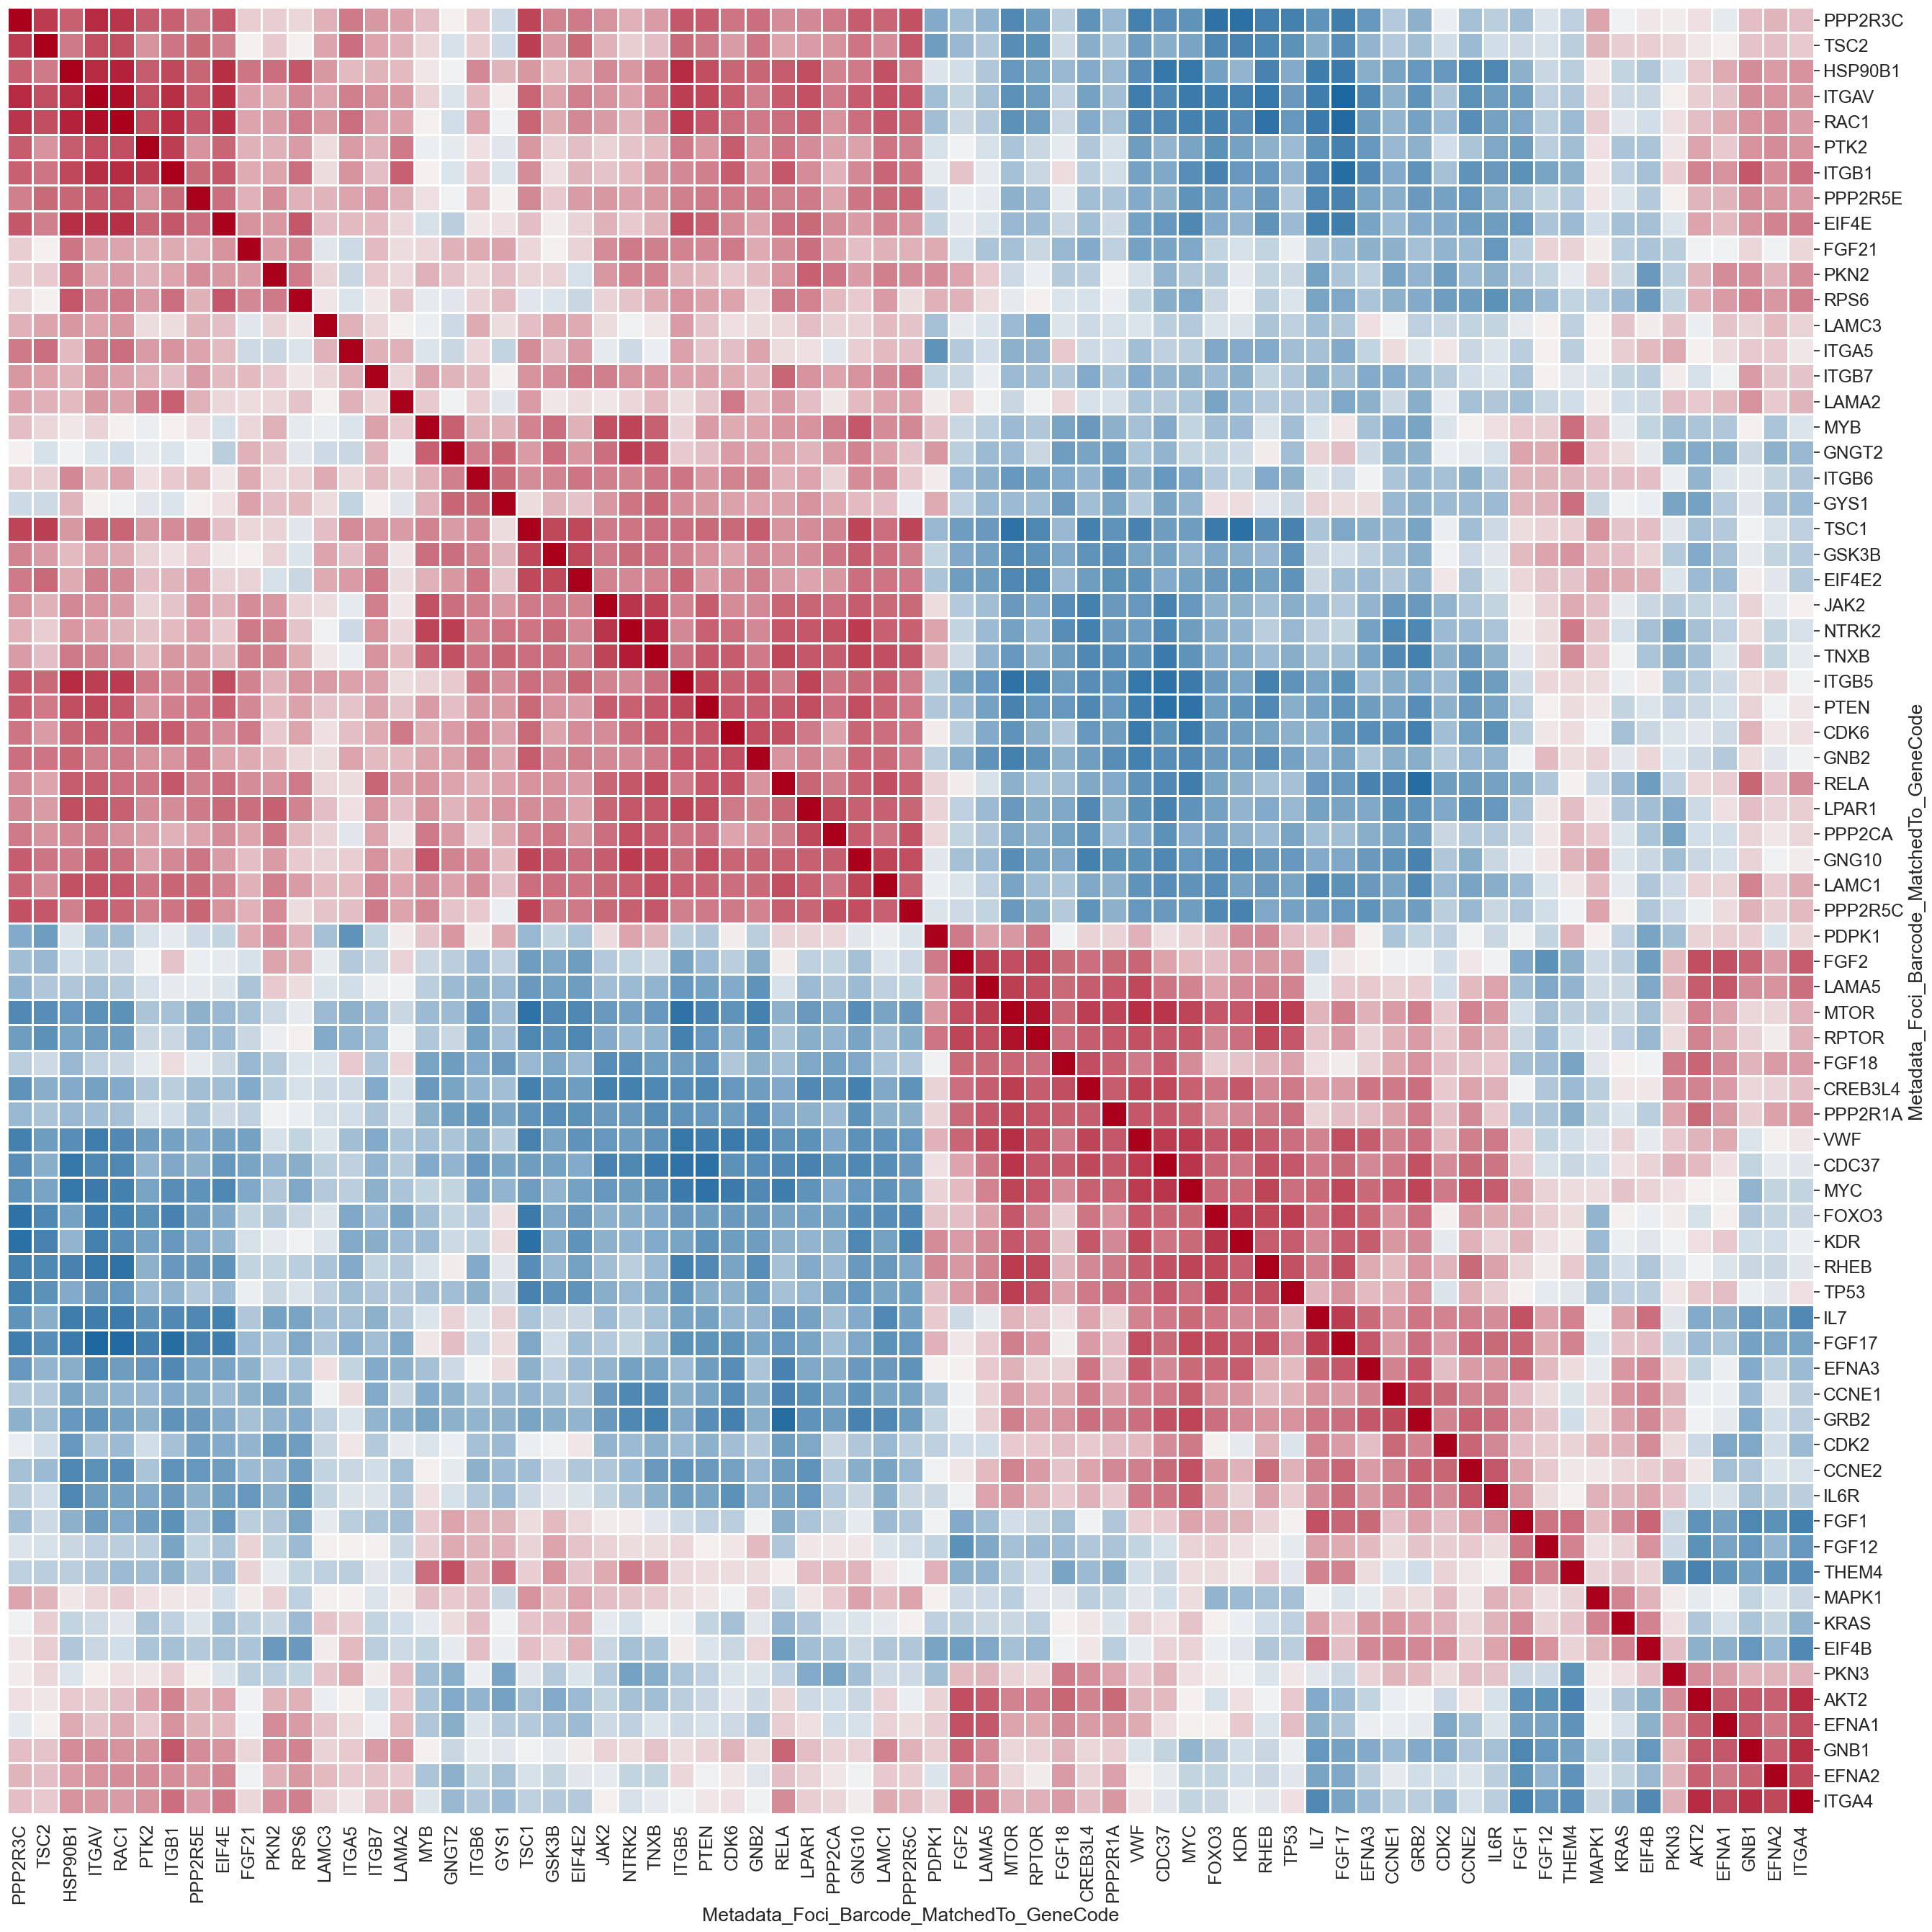

In [8]:
# Cluster the profiles & draw the heatmap
clustered_heat_map(genes_profiles.T,                
                   f'hela_dmem_median_profile_heatmap_clustering_gene_hits_{gene_set}_plate_level.png',
                   1.6,
                   0.8)



In [9]:
# Subset the profiles to select relevant genes
gene_set = 'gocc_ribosome'
genes = 'RNA5-8SN5	RNA5S1	RNA5S9	LINC01004	LZTS1-AS1	MRPS31	RACK1	MRPL28	MRPS30	GCN1	MRPL3	RPL35	MRPL53	MRPL54	RPL39L	CHCHD1	MRPL52	MRPL10	MRPL55	MTERF4	DNAJC21	RPS4Y2	RPL10L	DHX9	NR0B1	ELAVL4	RPL22L1	FAU	MRPL21	RPLP0P6	MRPS27	LARP4B	LARP1	RPL13A	RPL36	MTG2	MRPL46	SERP1	RPL7L1	MRPS28	MRPS18B	MRPL42	MRPL13	MRPL18	MRPL15	MRPL22	HBA1	HBA2	APEX1	MRPL58	APOD	NSUN4	RPSA	EIF2AK4	MT3	NCK1	NDUFA7	RPL10A	NPM1	MRPS16	MRPS18C	RPS27L	MRPL2	MRPL4	MRPS7	MRPS2	RPL26L1	HSPA14	RSL24D1	MRPL37	MRPL51	MRPL30	MRPL27	MRPL35	MRPS17	ZCCHC17	MRPL48	MRPS23	MRPS33	MRPL39	MRPS21	DHX29	MRPL50	MRPL16	AURKAIP1	PTCD3	MRPL20	MRPS18A	MRPS10	RPL39P5	EIF2AK2	MRPS22	MRPL47	NUFIP2	MRPS35	RPL3	RPL3L	RPL4	RPL5	RPL6	RPL7	RPL7A	RPL8	RPL9	RPL10	RPL11	RPL12	RPL13	RPL15	RPL17	RPL18	RPL18A	RPL19	RPL21	RPL22	RPL23A	MRPL23	RPL24	RPL26	RPL27	RPL30	RPL27A	RPL28	RPL29	RPL31	RPL32	RPL34	RPL35A	RPL36AL	RPL37	RPL37A	RPL38	RPL39	RPL41	RPL36A	RPLP0	RPLP1	RPLP2	MRPL12	MRPS12	RPS2	RPS3	RPS3A	RPS4X	RPS4Y1	RPS5	RPS6	RPS7	RPS8	RPS9	RPS10	RPS11	RPS12	RPS13	RPS14	RPS15	RPS15A	RPS16	RPS17	RPS18	RPS19	RPS20	RPS21	RPS23	RPS24	RPS25	RPS26	RPS27	RPS27A	RPS28	RPS29	RRBP1	MRPL17	NSUN3	MRPS14	MRPS25	RPL37AP8	RPL13AP3	MRPL14	MRPS26	MRPS24	MRPS15	MRPS11	MRPS9	MRPS6	MRPS5	MRPL41	MRPL40	MRPL38	MRPL36	MRPL34	MRPL32	MRPL11	MRPL9	MRPL1	MRPL44	MRPS34	SRP68	BTF3	UBA52	MRPL49	SF1	DAP3	MRPL57	MRPL24	CANX	RPS6KL1	EIF2A	MRPL45	MRPL43	MPV17L2	EIF3H	B3GALT4	PNPT1	FUBP3	RPL14	GADD45GIP1	MTG1	RPS10P5	RPL23	FXR2	MRPL33	ISG15	MRPL19'
genes_lst = genes.split('\t')
genes_df =  df_hits_pca[df_hits_pca['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genes_lst)]
genes_profiles = genes_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
len(genes_profiles)
#genes_profiles.head()

146

/opt/anaconda3/envs/periscope_2022/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


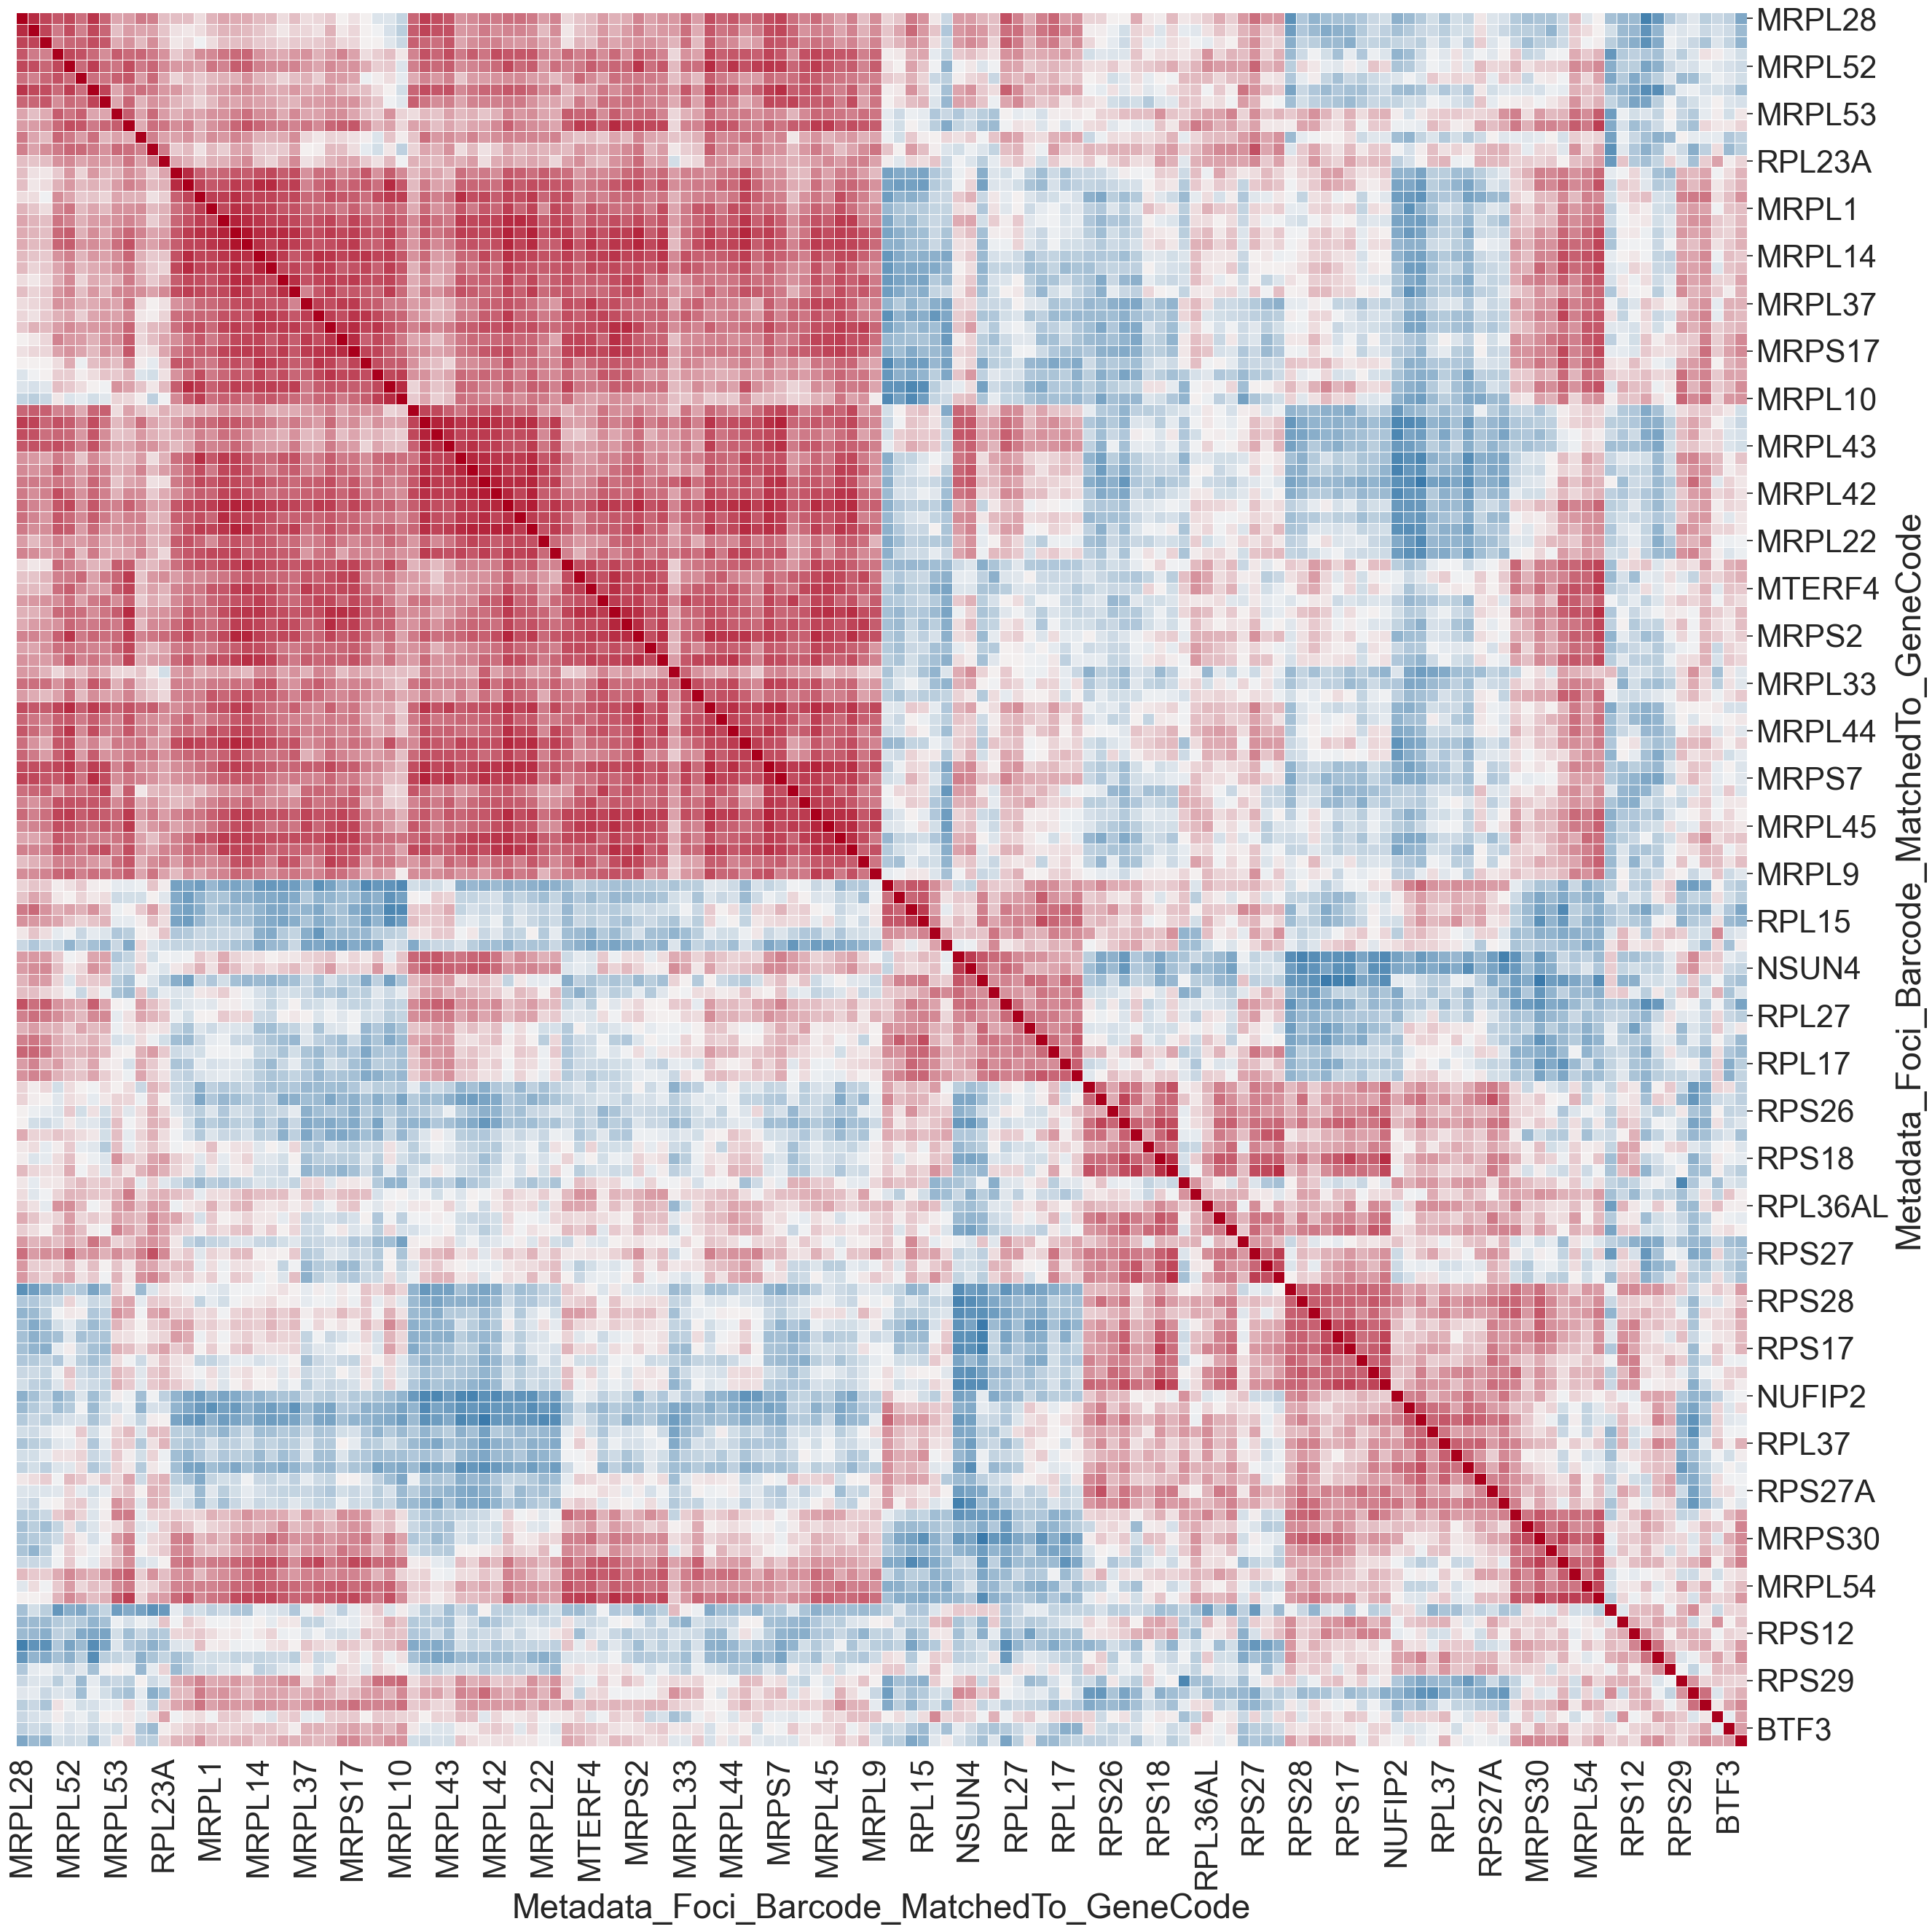

In [10]:
# Cluster the profiles & draw the heatmap
clustered_heat_map(genes_profiles.T,
                   f'hela_dmem_median_profile_heatmap_clustering_gene_hits_{gene_set}_plate_level.png',
                   2.8,
                   0.6)

